In [1]:
# Description : Create and plot multiple technical indicator using python.

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [71]:
# GET the stock starting date
stockDate = '2019-01-01'

# Get todays date and format it in the form YYYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')

today

'2020-11-27'

In [72]:
# Get the Stock Symbol for the Portfolio 
# FAANG
stockSymbols = ['GAIL.NS']

In [73]:
# Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks = stockSymbols, start = stockDate, end=today):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)

  
  data.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open','Volume']
  return data

In [74]:
# Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks#.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open','Volume']

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-01-01,167.128174,181.074997,182.000000,178.475006,179.500000,4269006.0
2019-01-02,161.659531,175.149994,180.949997,173.774994,180.274994,7056976.0
2019-01-03,161.498016,174.975006,176.225006,173.475006,175.149994,4795824.0
2019-01-04,162.974777,176.574997,176.949997,173.774994,175.125000,3675758.0
2019-01-07,164.797653,178.550003,179.024994,175.550003,176.750000,3408486.0
...,...,...,...,...,...,...
2020-11-23,100.900002,100.900002,101.500000,97.599998,99.000000,29687033.0
2020-11-24,100.300003,100.300003,102.500000,99.250000,101.800003,18023349.0
2020-11-25,102.300003,102.300003,103.699997,100.500000,101.349998,26160208.0


In [75]:
# Calculate the SMA and EMA & Create the Simple Moving Average(SMA)
def SMA(stock, period=20, column = 'Close'):

  return stock[column].rolling(window=period).mean()

def EMA(stock, period=20, column = 'Close'):

  return stock[column].ewm(span=period, adjust=False).mean()

In [76]:
# Calculate Moving Average Convergence/Divergence (MACD).
def MACD(data, period_long=20, period_short=12, period_signal=9, column = 'Close'):

  # Calculate the short term exponential moving average
  ShortEMA = data[column].ewm(span=period_short, adjust=False).mean()

  # Calculate the long term exponential moving average
  LongEMA = data[column].ewm(span=period_long, adjust=False).mean()

  # Calculate the MACD Line 
  data['MACD'] = ShortEMA - LongEMA

  # Calculate the signal line
  data['signal_line'] = data['MACD'].ewm(span=period_signal, adjust=False).mean()

  return data

In [77]:
# Create a function to compute the between Strength Index (RSI)
def RSI(data, period=14, column = 'Close'):
  
  # Get the positive gains (up) and the negative gains(down)
  delta = data[column].diff(1)
  up = delta.copy()
  down = delta.copy()

  up[up<0] = 0
  down[down > 0] = 0

  data['up'] = up
  data['down'] = down

  # Calculate the average gain and the average loss
  AVG_Gain = up.rolling(window=period).mean()
  AVG_Loss = abs(down.rolling(window=period).mean())

  # Calculate the Relative Strenght(RS)
  RS = AVG_Gain / AVG_Loss

  # Calculate the Relative Strength Index(RSI)
  RSI = 100.0 - (100.0 / (1.0 + RS))

  data['RSI'] = RSI

  return data

In [78]:
# Add above attribute to datasets

MACD(my_stocks)
RSI(my_stocks)
my_stocks['SMA'] = SMA(my_stocks)
my_stocks['EMA'] = EMA(my_stocks)

In [79]:
my_stocks

,Adj Close,Close,High,Low,Open,Volume,MACD,signal_line,up,down,RSI,SMA,EMA
Date,,,,,,,,,,,,,
2019-01-01,167.128174,181.074997,182.000000,178.475006,179.500000,4269006.0,0.000000,0.000000,NaN,NaN,NaN,NaN,181.074997
2019-01-02,161.659531,175.149994,180.949997,173.774994,180.274994,7056976.0,-0.347253,-0.069451,0.000000,-5.925003,NaN,NaN,180.510711
2019-01-03,161.498016,174.975006,176.225006,173.475006,175.149994,4795824.0,-0.618266,-0.179214,0.000000,-0.174988,NaN,NaN,179.983501
2019-01-04,162.974777,176.574997,176.949997,173.774994,175.125000,3675758.0,-0.722914,-0.287954,1.599991,0.000000,NaN,NaN,179.658882
2019-01-07,164.797653,178.550003,179.024994,175.550003,176.750000,3408486.0,-0.676686,-0.365700,1.975006,0.000000,NaN,NaN,179.553274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,100.900002,100.900002,101.500000,97.599998,99.000000,29687033.0,2.034622,1.142152,3.450005,0.000000,87.583192,89.024999,91.131444
2020-11-24,100.300003,100.300003,102.500000,99.250000,101.800003,18023349.0,2.258955,1.365512,0.000000,-0.599998,85.313221,89.764999,92.004641
2020-11-25,102.300003,102.300003,103.699997,100.500000,101.349998,26160208.0,2.514815,1.595373,2.000000,0.000000,88.594745,90.670000,92.985151


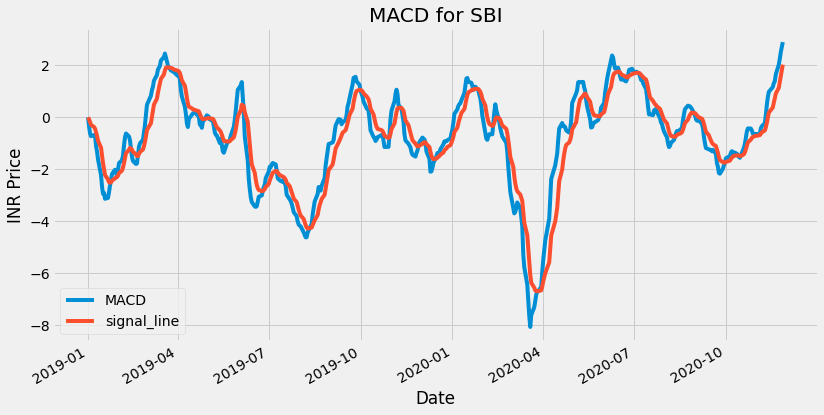

In [82]:
# Plot the chart
# Create a list of columns to keep
column_list = ['MACD', 'signal_line']
my_stocks[column_list].plot(figsize=(12.2, 6.4))
plt.title('MACD for SBI')
plt.ylabel('INR Price')
plt.xlabel('Date')
plt.show()

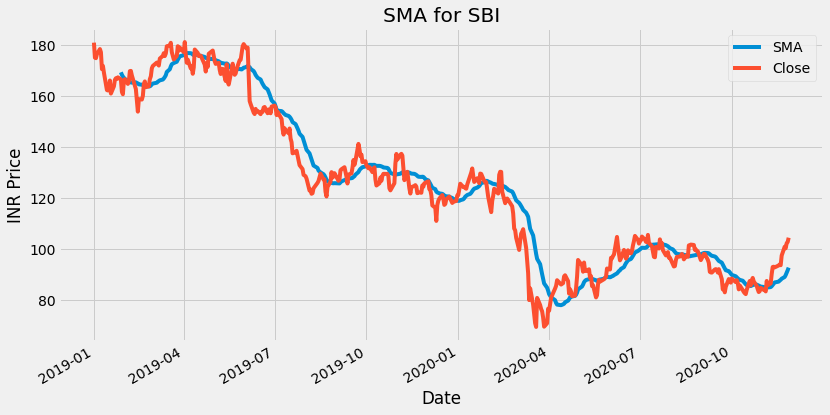

In [83]:
# Plot the chart
# Create a list of columns to keep
column_list = ['SMA', 'Close']
my_stocks[column_list].plot(figsize=(12.2, 6.4))
plt.title('SMA for SBI')
plt.ylabel('INR Price')
plt.xlabel('Date')
plt.show()

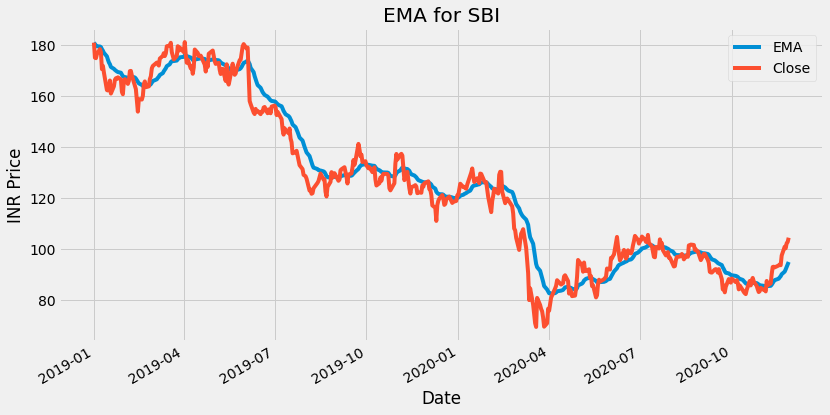

In [86]:
# Plot the chart
# Create a list of columns to keep
column_list = ['EMA', 'Close']
my_stocks[column_list].plot(figsize=(12.2, 6.4))
plt.title('EMA for SBI')
plt.ylabel('INR Price')
plt.xlabel('Date')
plt.show()

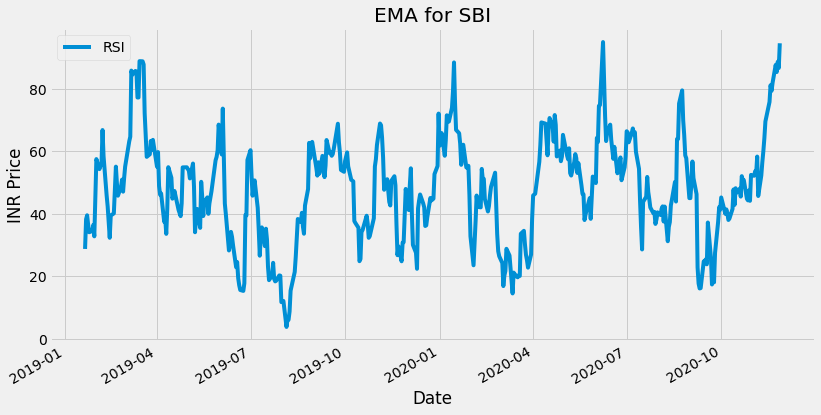

In [87]:
# Plot the chart
# Create a list of columns to keep
column_list = ['RSI']
my_stocks[column_list].plot(figsize=(12.2, 6.4))
plt.title('EMA for SBI')
plt.ylabel('INR Price')
plt.xlabel('Date')
plt.show()